# Banking Business Case

**Problem Statement:** A major bank in Middle East came to NeoStats with help in analysing its current 
customer base and its marketing campaigns. It wants to understand which customers are most likely 
to take a term deposit (fixed deposit), and then send this list to their call centre.

In [508]:
#importing the libraries-
import  pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from warnings import filterwarnings
filterwarnings('ignore')
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,KFold


In [400]:
df=pd.read_csv("final_data.csv",low_memory=False)

In [401]:
df.head()

,Customer_number,age,job,marital,education,Annual Income,Gender,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,1001,58,management,married,tertiary,839368,M,no,2143,yes,no,NaN,261.0,1,2,0,unknown,no,351.0
1,1002,44,technician,single,secondary,1452858,M,no,29,yes,no,unknown,151.0,1,2,0,unknown,no,326.0
2,1003,33,entrepreneur,married,NaN,4851383,F,no,2,yes,yes,unknown,76.0,1,2,0,NaN,no,422.0
3,1004,47,blue collar,married,unknown,3207754,F,no,1506,yes,no,unknown,92.0,1,2,0,unknown,no,113.0
4,1005,33,unknown,single,unknown,2562322,M,no,1,no,no,unknown,198.0,1,2,0,unknown,no,342.0


In [402]:
df.shape

(45211, 19)

In [403]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_number   45211 non-null  int64  
 1   age               45211 non-null  int64  
 2   job               45198 non-null  object 
 3   marital           45193 non-null  object 
 4   education         45190 non-null  object 
 5   Annual Income     45194 non-null  object 
 6   Gender            45211 non-null  object 
 7   Insurance         45211 non-null  object 
 8   balance           45156 non-null  object 
 9   housing           45211 non-null  object 
 10  loan              45203 non-null  object 
 11  contact           45168 non-null  object 
 12  duration          45172 non-null  float64
 13  campaign          45211 non-null  int64  
 14  last_contact_day  45211 non-null  int64  
 15  previous          45211 non-null  int64  
 16  poutcome          45196 non-null  object

In [404]:
df.isnull().sum()

Customer_number      0
age                  0
job                 13
marital             18
education           21
Annual Income       17
Gender               0
Insurance            0
balance             55
housing              0
loan                 8
contact             43
duration            39
campaign             0
last_contact_day     0
previous             0
poutcome            15
Term Deposit         8
Count_Txn            1
dtype: int64

In [405]:
df.duplicated().sum()

0

**Lets change the data types of the required features **

In [406]:
df['balance'] = df['balance'].apply(pd.to_numeric, errors='coerce', downcast='integer')

In [407]:
df['balance'].dtypes

dtype('float64')

In [408]:
df['Annual Income'] = df['Annual Income'].apply(pd.to_numeric, errors='coerce', downcast='integer')

In [409]:
df['previous'] = df['previous'].astype(int)

In [410]:
df['Term Deposit'].unique()

array(['no', 'yes', nan], dtype=object)

In [411]:
df['Term Deposit'] = df['Term Deposit'].replace({'no':0,'yes':1})

In [412]:
df.dtypes

Customer_number       int64
age                   int64
job                  object
marital              object
education            object
Annual Income       float64
Gender               object
Insurance            object
balance             float64
housing              object
loan                 object
contact              object
duration            float64
campaign              int64
last_contact_day      int64
previous              int32
poutcome             object
Term Deposit        float64
Count_Txn           float64
dtype: object

**Analysis Questions:**
    
1. How many customers have no annual income? Plot and present the data distribution
of these customers?
2.Filter out customers who don’t have any type of loan. Plot the distribution of their 
Income, balance, and profession. How do these metrics differ from those with loans?
3.Calculate the percentage of customers with a loan who have taken out insurance. 
Visualize this data and discuss potential implications.
4.Analyse and summarize the best Contact method (with the highest success 
percentage) to contact people to ascertain the status of term deposit subscriptions.
5. Determine which age group has the highest percentage of home loans. Present this 
data visually and discuss possible reasons.
6.Investigate any relationships between annual income and age group. Use 
appropriate plots and statistics to present the findings.

# We are considering the Annual Income as 0 where there are nulls.

In [413]:
#customers having no annual income
df['Annual Income'].isnull().sum()

18

In [414]:
df['Annual Income'].fillna(0,inplace=True)

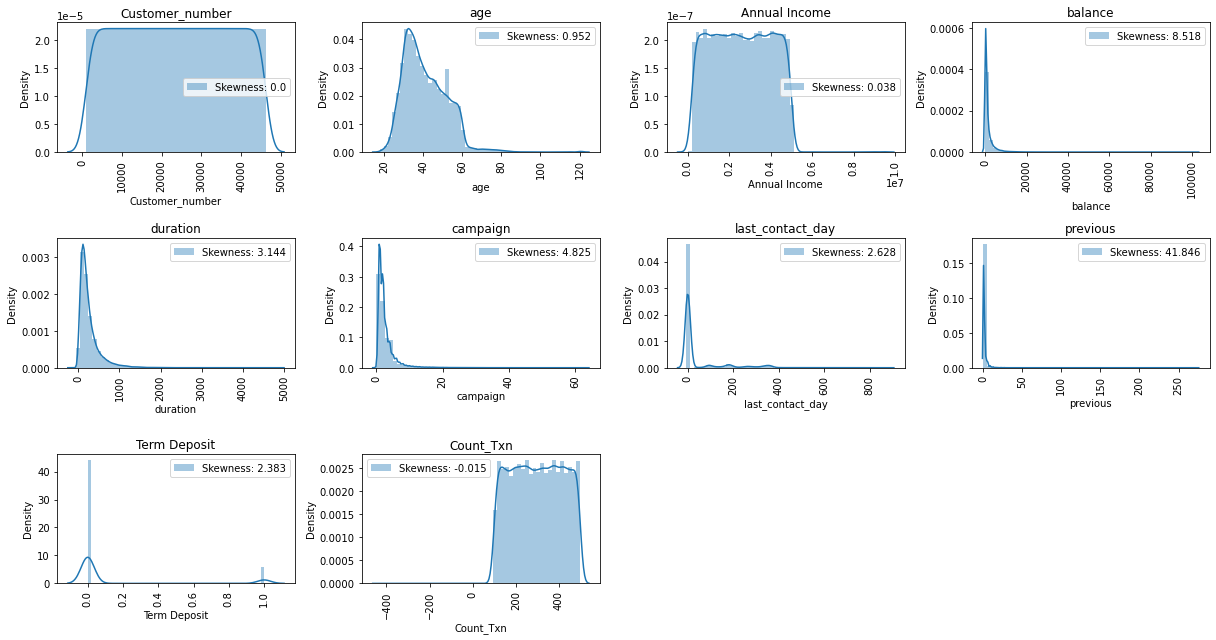

In [415]:
numeric_columns_0_income=df[df['Annual Income']<=0].select_dtypes(exclude='object')
plt.rcParams['figure.figsize']=[17,9]
rows=3
columns=4
iterator=1
for k in numeric_columns_0_income.columns:
    plt.subplot(rows,columns,iterator)
    sns.distplot(df.loc[:,k],label= 'Skewness:'+' '+str(round(df[k].skew(),3)))
    plt.title(k)
    plt.legend()
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout() 


#Visual distribution of customers having no income

In [416]:
#Filter out customers who don’t have any type of loan
no_loan=df[df['loan']=='no']


In [417]:
with_loan=df[df['loan']=='yes']

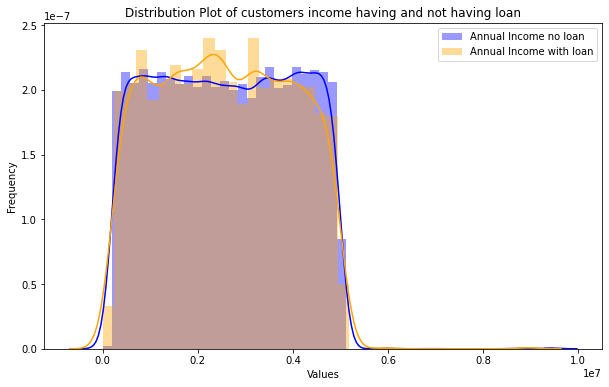

In [418]:

# Create a Seaborn distribution plot
plt.figure(figsize=(10, 6))
sns.distplot(no_loan['Annual Income'], kde=True, label='Annual Income no loan', color='blue')
sns.distplot(with_loan['Annual Income'], kde=True, label='Annual Income with loan', color='orange')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution Plot of customers income having and not having loan')

# Add legend
plt.legend()

# Show the plot
plt.show()


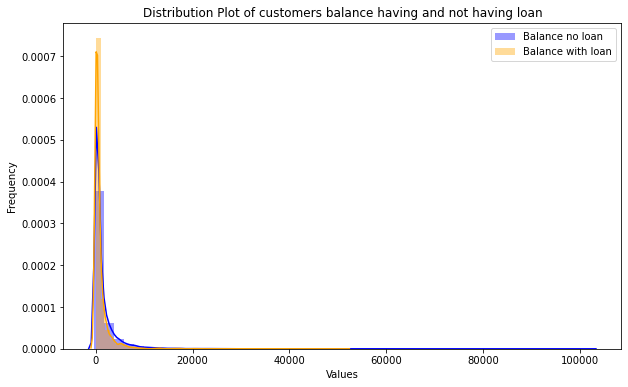

In [419]:

# Create a Seaborn distribution plot
plt.figure(figsize=(10, 6))
sns.distplot(no_loan['balance'], kde=True, label='Balance no loan', color='blue')
sns.distplot(with_loan['balance'], kde=True, label='Balance with loan', color='orange')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution Plot of customers balance having and not having loan')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [420]:
df


,Customer_number,age,job,marital,education,Annual Income,Gender,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit,Count_Txn
0,1001,58,management,married,tertiary,839368.0,M,no,2143.0,yes,no,NaN,261.0,1,2,0,unknown,0.0,351.0
1,1002,44,technician,single,secondary,1452858.0,M,no,29.0,yes,no,unknown,151.0,1,2,0,unknown,0.0,326.0
2,1003,33,entrepreneur,married,NaN,4851383.0,F,no,2.0,yes,yes,unknown,76.0,1,2,0,NaN,0.0,422.0
3,1004,47,blue collar,married,unknown,3207754.0,F,no,1506.0,yes,no,unknown,92.0,1,2,0,unknown,0.0,113.0
4,1005,33,unknown,single,unknown,2562322.0,M,no,1.0,no,no,unknown,198.0,1,2,0,unknown,0.0,342.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,46207,51,technician,married,tertiary,2229818.0,M,no,825.0,no,no,cellular,0.0,0,-1,0,unknown,1.0,152.0
45207,46208,121,retired,divorced,primary,2783556.0,M,no,1729.0,no,no,cellular,0.0,0,-1,0,unknown,1.0,334.0
45208,46209,72,retired,married,secondary,443512.0,M,no,5715.0,no,no,cellular,1127.0,5,184,3,success,1.0,381.0
45209,46210,57,blue-collar,married,secondary,4193684.0,F,no,668.0,no,no,telephone,0.0,0,-1,0,unknown,0.0,211.0


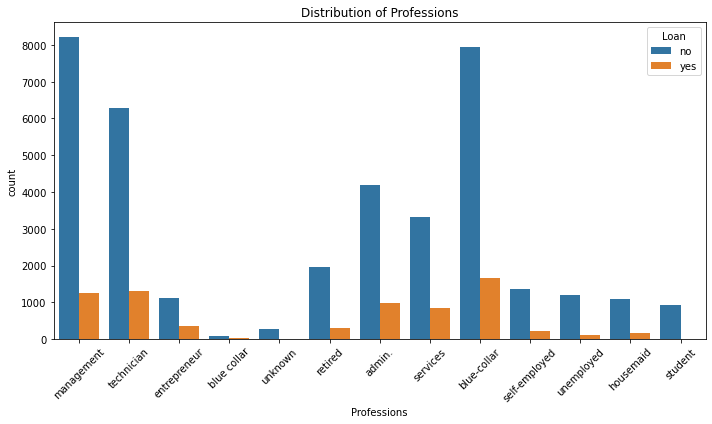

In [421]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'categorical_column1' and 'categorical_column2' are the columns you want to plot

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job', hue='loan')
plt.xlabel('Professions')
plt.ylabel('count')
plt.title('Distribution of Professions')
plt.legend(title='Loan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [422]:
#The percentage of customers with a loan who have taken out insurance
loan_with_insurance=df[(df['loan']=='yes')&(df['Insurance']=='yes')].select_dtypes(include=np.number)

In [423]:
percent=(loan_with_insurance.shape[0]/df.shape[0])*100

In [424]:
percent

0.6657671805534051

In [425]:
loan_with_insurance

,Customer_number,age,Annual Income,balance,duration,campaign,last_contact_day,previous,Term Deposit,Count_Txn
572,1573,41,4973772.0,137.0,189.0,1,1,0,0.0,404.0
852,1853,54,4948643.0,248.0,112.0,1,1,0,0.0,217.0
932,1933,40,4943134.0,94.0,227.0,1,1,0,0.0,236.0
1197,2198,51,1150559.0,57.0,61.0,1,1,0,0.0,195.0
1589,2590,35,1929171.0,89.0,166.0,3,1,0,0.0,324.0
...,...,...,...,...,...,...,...,...,...,...
38244,39245,39,470042.0,202.0,157.0,4,1,0,0.0,116.0
39290,40291,32,4551156.0,5.0,82.0,3,363,2,0.0,310.0
39347,40348,24,248247.0,1414.0,171.0,2,1,0,0.0,140.0
39674,40675,58,245563.0,235.0,93.0,2,1,0,0.0,334.0


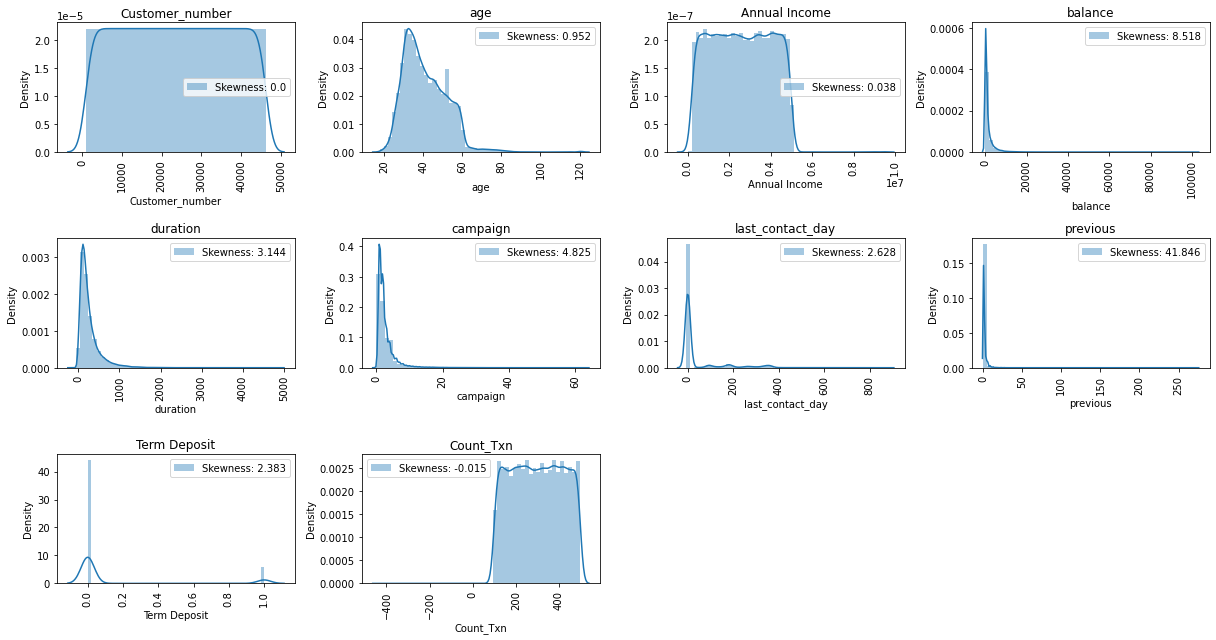

In [426]:
plt.rcParams['figure.figsize']=[17,9]
rows=3
columns=4
iterator=1
for k in loan_with_insurance.columns:
    plt.subplot(rows,columns,iterator)
    sns.distplot(df.loc[:,k],label= 'Skewness:'+' '+str(round(df[k].skew(),3)))
    plt.title(k)
    plt.legend()
    iterator+=1
    plt.xticks(rotation=90)
plt.tight_layout() 


Visual distribution of customers with a loan who have taken out insurance

In [427]:
#Analyse and summarize the best Contact method (with the highest success percentage)
df.contact.unique()

array([nan, 'unknown', '?', 'cellular', 'telephone', 'Mobile', 'Tel'],
      dtype=object)

In [428]:
df['contact'].replace({'?':'unknown',np.NaN:'unknown'},inplace=True)

In [429]:
df.contact.unique()

array(['unknown', 'cellular', 'telephone', 'Mobile', 'Tel'], dtype=object)

In [430]:
df.contact.unique()

array(['unknown', 'cellular', 'telephone', 'Mobile', 'Tel'], dtype=object)

In [431]:
df.groupby('contact')['Term Deposit'].value_counts()

contact    Term Deposit
Mobile     0.0                29
Tel        1.0                11
           0.0                 9
cellular   0.0             24914
           1.0              4368
telephone  0.0              2472
           1.0               378
unknown    0.0             12490
           1.0               532
Name: Term Deposit, dtype: int64

<Figure size 288x144 with 0 Axes>

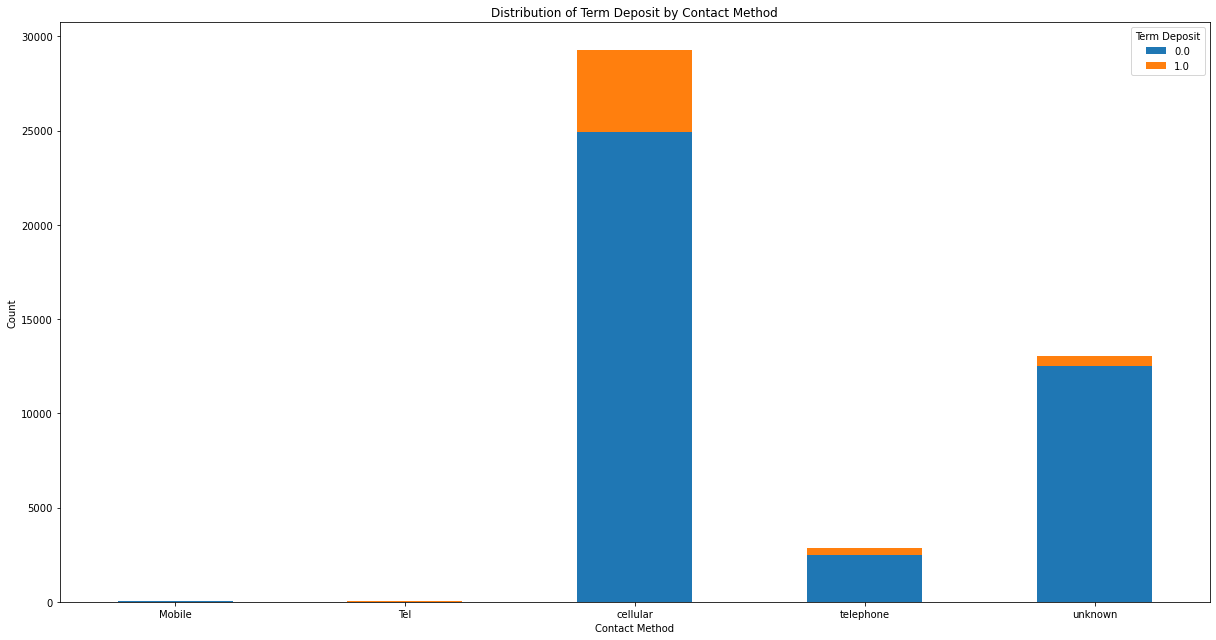

In [432]:
result = df.groupby('contact')['Term Deposit'].value_counts().unstack()

plt.figure(figsize=(4, 2))
result.plot(kind='bar', stacked=True)
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.title('Distribution of Term Deposit by Contact Method')
plt.legend(title='Term Deposit')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [433]:
#Determine which age group has the highest percentage of home loans
df['age'].describe()

count    45211.000000
mean        40.980005
std         10.838273
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max        121.000000
Name: age, dtype: float64

In [434]:


def age_bins(x):
    if x <= 45:
        return 'Young'
    elif x > 45 and x <= 60:
        return 'Elder'
    else:
        return 'Older'

df['age'] = df['age'].apply(age_bins)



In [435]:
df.groupby('age')['housing'].value_counts(normalize=True)

age    housing
Elder  no         0.541931
       yes        0.458069
Older  no         0.930976
       yes        0.069024
Young  yes        0.616780
       no         0.383220
Name: housing, dtype: float64

<AxesSubplot:xlabel='age'>

<Figure size 288x144 with 0 Axes>

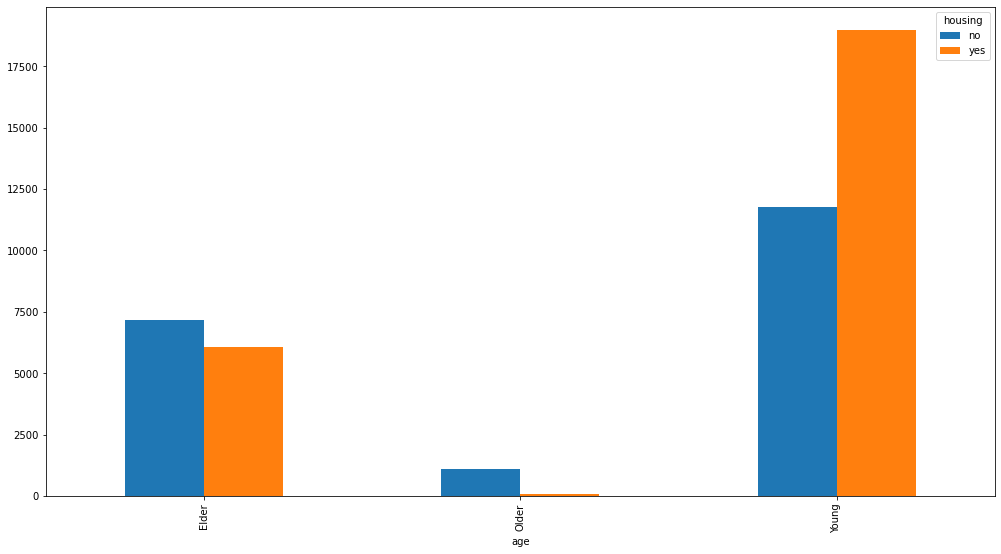

In [436]:
plt.figure(figsize=(4, 2))

pd.crosstab(df['age'],df['housing']).plot(kind='bar')

It is clearly shown that the Young people (18 - 45) took majority of housing loans

# Since the Age has more than 2 populations i am going for ANOVA to check the impact of AGE on Housing Loan

In [437]:
#Investigate any relationships between annual income and age group.
#Use appropriate plots and statistics to present the findings.
group1=df[df['age']=='Young']['Annual Income']
group2=df[df['age']=='Elder']['Annual Income']
group3=df[df['age']=='Older']['Annual Income']

# Perform ANOVA test
f_statistic, p_value = f_oneway(group1,group2,group3)

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Means are not all equal.")
else:
    print("Fail to reject the null hypothesis: Means are all equal.")


F-Statistic: 0.196650340957348
P-Value: 0.8214785229551174
Fail to reject the null hypothesis: Means are all equal.


As per the Statistical Analysis Age has no such effect on Annual Income

**Modeling:**
1. Term Deposit and Related Variables:
• Identify variables strongly related to Term Deposit. Discuss your approach when the 
variable is categorical. Which tests or metrics will you employ?
2. Predictive Model Building:
• Train a prediction model of your choice to estimate the probability that a customer 
will opt for a term deposit. Adhere to an 80:20 train:test split. Report and present 
the model's performance metrics on both the train and test datasets.
3. Model Improvement Strategies:
• Discuss potential methods or approaches to enhance model performance. This could 
include feature engineering, different algorithms, or refining the data preprocessing 
steps.

# Before comming to Modeling  treating the null values and identify the outliers

* **Null values** are data points that are absent from certain fields or attributes in a dataset. Failing to handle null values appropriately can lead to biased or inaccurate models.
* Dealing with Null Values: There are several strategies to handle null values:

1. **Removal:** You can remove rows or columns with null values if the amount of missing data is relatively small and doesn't impact the overall dataset significantly.
2. **Imputation:** Imputation involves filling null values with estimated or calculated values. Common imputation techniques include mean, median, mode imputation, or using more advanced methods like regression-based imputation.
3. **Predictive Imputation:** You can use machine learning models to predict missing values based on the available data. This can be effective if the missing data pattern is predictable.
4. **Domain Knowledge:** In some cases, domain knowledge can guide you in assigning appropriate values to missing data based on the context of the problem.

In [438]:
Total = df.isnull().sum().sort_values(ascending=False)          
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
balance,81,0.179160
duration,39,0.086262
education,21,0.046449
marital,18,0.039813
poutcome,15,0.033178
job,13,0.028754
Term Deposit,8,0.017695
loan,8,0.017695
Count_Txn,1,0.002212
previous,0,0.000000


In [439]:
#balance has 18 % of nulls so i imputed it by median but rest of the variables have around 1 % of nulls so droping them
df['balance'].fillna(df['balance'].median(),inplace=True)
df.dropna(axis=0,inplace=True)

<AxesSubplot:>

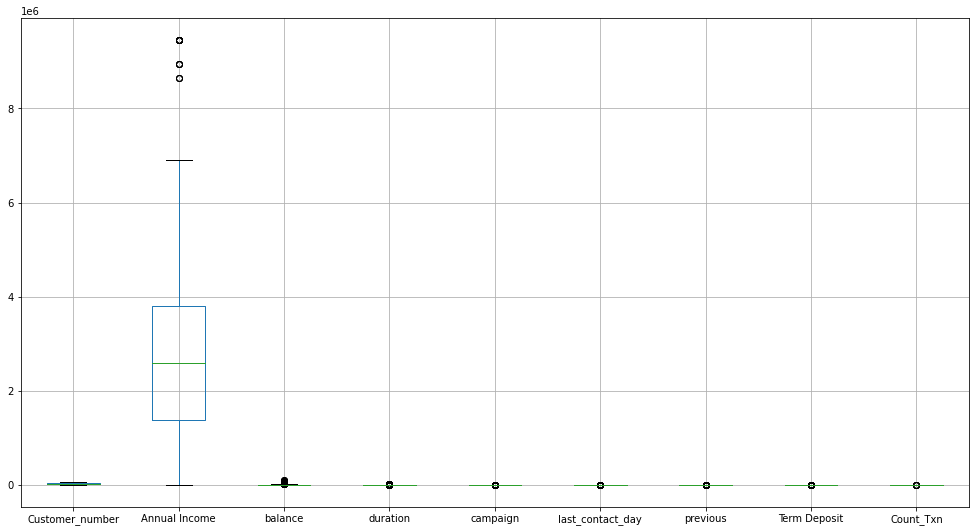

In [440]:
df.boxplot()

In [441]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
df[((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any(axis=1)].shape


(16909, 19)

From the above analysis i found that the data dont have noise the outliers are real data as it is possible to have rich people in our data so i am not removing or imputing them.

# Applying Statistical Tests to know the significance of indipendent variables on target for Numerical T test indipendence and for categorical Chi-Square & Anova tests

In [442]:
df_num=df.select_dtypes(include=np.number)
df_cat=df.select_dtypes(exclude=np.number)

In [443]:
df_cat

,age,job,marital,education,Gender,Insurance,housing,loan,contact,poutcome
0,Elder,management,married,tertiary,M,no,yes,no,unknown,unknown
1,Young,technician,single,secondary,M,no,yes,no,unknown,unknown
3,Elder,blue collar,married,unknown,F,no,yes,no,unknown,unknown
4,Young,unknown,single,unknown,M,no,no,no,unknown,unknown
5,Young,management,married,ter tiary,M,no,yes,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...
45206,Elder,technician,married,tertiary,M,no,no,no,cellular,unknown
45207,Older,retired,divorced,primary,M,no,no,no,cellular,unknown
45208,Older,retired,married,secondary,M,no,no,no,cellular,success
45209,Elder,blue-collar,married,secondary,F,no,no,no,telephone,unknown


In [444]:
df_cat['education'].nunique()

6

In [445]:
static_val=[]
pvalue=[]
for k in df_num.columns:
    s1=df[df['Term Deposit']==0][k]
    s2=df[df['Term Deposit']==1][k]
    static,pval=ttest_ind(s1,s2)
    static_val.append(static)
    pvalue.append(pval)
    dic={'static_val':static_val,'pvalue':pvalue}
num_test_df=pd.DataFrame(dic)
num_test_df
num_test_df['Features']=df_num.columns
non_significant=num_test_df[num_test_df['pvalue']>0.05]
l=non_significant.Features.to_list()
print(l)
df=df.drop(l,axis=1)

['Count_Txn']


According to the analysis in numeric features every feature except Count_Txn is statistically significant for our analysis so i dropped Count_Txn.

In [446]:
p_value=[]
for i in df_cat.columns:
    obs_val=pd.crosstab(df_cat[i],df['Term Deposit'])
    stat,p_val,dof,exp=chi2_contingency(obs_val.values)
    p_value.append(p_val)
cat_stats=pd.DataFrame(p_value,index=df_cat.columns,columns=['p_value'])
cat_non_significant=cat_stats[cat_stats['p_value']>0.05]
l1=cat_non_significant.index.to_list()
print(l1)
# cat=df_cat.drop(l1,axis=1)


[]


According to the analysis in categorical features every feature is statistically significant for our analysis .

In [447]:
#There is no need for Customer number for our analysis because we are not deploying the model in production
df = df.drop('Customer_number', axis = 1)

# Predictive Model Building

**Predictive Model Building: • Train a prediction model of your choice to estimate the probability that a customer will opt for a term deposit. Adhere to an 80:20 train:test split. Report and present the model's performance metrics on both the train and test datasets.**

### 1.2 Split the dependent and independent variables.

In [463]:
df_target=df['Term Deposit']

In [464]:
df_var=df.drop("Term Deposit",axis=1)

#### Filter numerical and categorical variables.

In [450]:
df_num=df_var.select_dtypes(np.number)

In [451]:
df_cat=df_var.select_dtypes("object")

# Scaling

We scale the variables to get all the variables in the same range. With this, we can avoid a problem in which some features come to dominate solely because they tend to have larger values than others.

In [452]:
SS=StandardScaler()
df[df_num.columns] = SS.fit_transform(df[df_num.columns])

In [453]:
df

,age,job,marital,education,Annual Income,Gender,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,poutcome,Term Deposit
0,Elder,management,married,tertiary,-1.259870,M,no,0.242570,yes,no,unknown,0.011245,-0.570936,-0.400862,-0.252008,unknown,0.0
1,Young,technician,single,secondary,-0.819564,M,no,-0.461050,yes,no,unknown,-0.415765,-0.570936,-0.400862,-0.252008,unknown,0.0
3,Elder,blue collar,married,unknown,0.439938,F,no,0.030552,yes,no,unknown,-0.644798,-0.570936,-0.400862,-0.252008,unknown,0.0
4,Young,unknown,single,unknown,-0.023293,M,no,-0.470370,no,no,unknown,-0.233315,-0.570936,-0.400862,-0.252008,unknown,0.0
5,Young,management,married,ter tiary,0.980264,M,no,-0.393817,yes,no,unknown,-0.462348,-0.570936,-0.400862,-0.252008,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,Elder,technician,married,tertiary,-0.261934,M,no,-0.196111,no,no,cellular,-1.001933,-0.894621,-0.431004,-0.252008,unknown,1.0
45207,Older,retired,divorced,primary,0.135488,M,no,0.104775,no,no,cellular,-1.001933,-0.894621,-0.431004,-0.252008,unknown,1.0
45208,Older,retired,married,secondary,-1.543979,M,no,1.431468,no,no,cellular,3.372980,0.723802,1.427751,1.049321,success,1.0
45209,Elder,blue-collar,married,secondary,1.147548,F,no,-0.248366,no,no,telephone,-1.001933,-0.894621,-0.431004,-0.252008,unknown,0.0


## 2.1 Encoding

In [454]:
df_cat.columns

Index(['age', 'job', 'marital', 'education', 'Gender', 'Insurance', 'housing',
       'loan', 'contact', 'poutcome'],
      dtype='object')

In [455]:
## let this code be here. 
for i in df_cat.columns:
    print(i)
    print(df[i].unique())
    print("--------------------------")
    

age
['Elder' 'Young' 'Older']
--------------------------
job
['management' 'technician' 'blue collar' 'unknown' 'entrepreneur'
 'retired' 'admin.' 'services' 'blue-collar' 'self-employed' 'unemployed'
 'housemaid' 'student']
--------------------------
marital
['married' 'single' 'divorced']
--------------------------
education
['tertiary' 'secondary' 'unknown' 'ter tiary' 'primary' 'Primary']
--------------------------
Gender
['M' 'F']
--------------------------
Insurance
['no' 'yes']
--------------------------
housing
['yes' 'no']
--------------------------
loan
['no' 'yes']
--------------------------
contact
['unknown' 'cellular' 'telephone' 'Mobile' 'Tel']
--------------------------
poutcome
['unknown' 'pending' '????' '?' 'failure' 'other' 'success']
--------------------------


In [456]:
#Changing the name of column
df.rename(columns={'poutcome': 'Outcome'}, inplace=True)
df['Outcome'].replace({'????':'unknown','?':'unknown'},inplace=True)



In [457]:
#Feature have many unique values and dont have any order so i am performing frequecy encoding
dic=df['contact'].value_counts(normalize=True)
df['contact'] = df['contact'].map(dic)
dic1=df['Outcome'].value_counts(normalize=True)
df['Outcome'] = df['Outcome'].map(dic1)
dic2=df['job'].value_counts(normalize=True)
df['job'] = df['job'].map(dic2)

In [458]:
#Age & Education have a order so we are doing ordinal encoding
df['age'].replace({'Elder':1,'Young':2,'Older':0},inplace=True)
df['education'].replace({'unknown': 0,
    'Primary': 1,
    'primary': 1,
    'secondary': 2,
    'tertiary': 3,
    'ter tiary': 3},inplace=True)

In [459]:
#Converting boalian into numbers 
df['loan'] = df['loan'].replace({'no':0,'yes':1})
df['housing'] = df['housing'].replace({'no':0,'yes':1})
df['Insurance'] = df['Insurance'].replace({'no':0,'yes':1})


In [460]:
#Performing dummy encoding on below features because they dont have a lot of categories and they dont have any order
marital_dummies = pd.get_dummies(df['marital'], prefix='marital', drop_first=True)
gender_dummies = pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True)

# Concatenate the dummy columns back to the DataFrame
df = pd.concat([df, marital_dummies, gender_dummies], axis=1)

# Drop the original 'marital' and 'Gender' columns
df.drop(['marital', 'Gender'], axis=1, inplace=True)



In [462]:
df.head()

,age,job,education,Annual Income,Insurance,balance,housing,loan,contact,duration,campaign,last_contact_day,previous,Outcome,Term Deposit,marital_married,marital_single,Gender_M
0,1,0.209430,3,-1.259870,0,0.242570,1,0,0.287121,0.011245,-0.570936,-0.400862,-0.252008,0.816075,0.0,1,0,1
1,2,0.168001,2,-0.819564,0,-0.461050,1,0,0.287121,-0.415765,-0.570936,-0.400862,-0.252008,0.816075,0.0,0,1,1
3,1,0.002173,0,0.439938,0,0.030552,1,0,0.287121,-0.644798,-0.570936,-0.400862,-0.252008,0.816075,0.0,1,0,0
4,2,0.006387,0,-0.023293,0,-0.470370,0,0,0.287121,-0.233315,-0.570936,-0.400862,-0.252008,0.816075,0.0,0,1,1
5,2,0.209430,3,0.980264,0,-0.393817,1,0,0.287121,-0.462348,-0.570936,-0.400862,-0.252008,0.816075,0.0,1,0,1


### 2.3 Train-Test Split

In [465]:
x_train, x_test, y_train, y_test = train_test_split(df_var, df_target, random_state = 10, test_size = 0.2)
print('x_train', x_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (36071, 17)
y_train (36071,)
x_test (9018, 17)
y_test (9018,)


### 2.4 Create a generalized function to calculate the metrics for the train and the test set.

In [466]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    train_pred = model.predict(x_train)
    return(classification_report(y_train, train_pred))

In [467]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    test_pred = model.predict(x_test)
    return(classification_report(y_test, test_pred))

# Models using Train Test Split

## 3. Decision Tree for Classification

Decision Tree is a non-parametric supervised learning method. It builds a model in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets, which is called splitting. A decision node is a node on which a decision of split is to be made. A node that can not be split further is known as the terminal/leaf node. A leaf node represents the decision. A decision tree can work with both numerical and categorical variables.

A decision tree for classification is built using criteria like the Gini index and entropy.

#### Build a full decision tree model on a train dataset using 'entropy'.

In [471]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
decision_tree = decision_tree_classification.fit(x_train, y_train)

**Calculate performance measures on the train set.**

In [472]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31846
         1.0       1.00      1.00      1.00      4225

    accuracy                           1.00     36071
   macro avg       1.00      1.00      1.00     36071
weighted avg       1.00      1.00      1.00     36071



**Calculate performance measures on the test set.**

In [473]:
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      7966
         1.0       0.41      0.43      0.42      1052

    accuracy                           0.86      9018
   macro avg       0.66      0.67      0.67      9018
weighted avg       0.86      0.86      0.86      9018



**Interpretation:** From the above output, we can see that there is a difference between the train and test recall; thus, we can conclude that the decision tree is highely over-fitted on the train data.

## 4. Random Forest for Classification

It is the method of constructing multiple decision trees on randomly selected data samples. We can use the bootstrap sampling method to select the random samples of the same size from the dataset to construct multiple trees. This method is used for both regression and classification analysis. The random forest returns the prediction based on all the individual decision trees prediction. For regression, it returns the average of all the predicted values; and for classification, it returns the class, which is the mode of all the predicted classes. 

It avoids the over-fitting problem as it considers a random data sample to construct a decision tree. 

In [474]:
rf_classification = RandomForestClassifier(n_estimators = 10, random_state = 10)
rf_model = rf_classification.fit(x_train, y_train)

**Calculate performance measures on the train set.**

In [475]:
train_report = get_train_report(rf_model)
print(train_report) 

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     31846
         1.0       1.00      0.93      0.96      4225

    accuracy                           0.99     36071
   macro avg       0.99      0.96      0.98     36071
weighted avg       0.99      0.99      0.99     36071



**Calculate performance measures on the test set.**

In [476]:
test_report = get_test_report(rf_model)
print(test_report) 

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      7966
         1.0       0.59      0.33      0.43      1052

    accuracy                           0.90      9018
   macro avg       0.75      0.65      0.68      9018
weighted avg       0.88      0.90      0.88      9018



### Identify the Important Features

Let us create a barplot to identify the important feature in the dataset.

The method `feature_importances_` returns the value corresponding to each feature which is defined as the ratio of total decrease in `Gini impurity` across every tree in the forest where the feature is used to the total count of trees in the forest. This is also caled as, `Gini Importance`.

There is another `accuracy-based` method. It calculates the average decrease in the accuracy calculated on the out-of-bag samples, with and without shuffling the variable across all the trees in the random forest. 
The `out-of-bag` samples are the samples in the training dataset which are not considered whild building a tree.

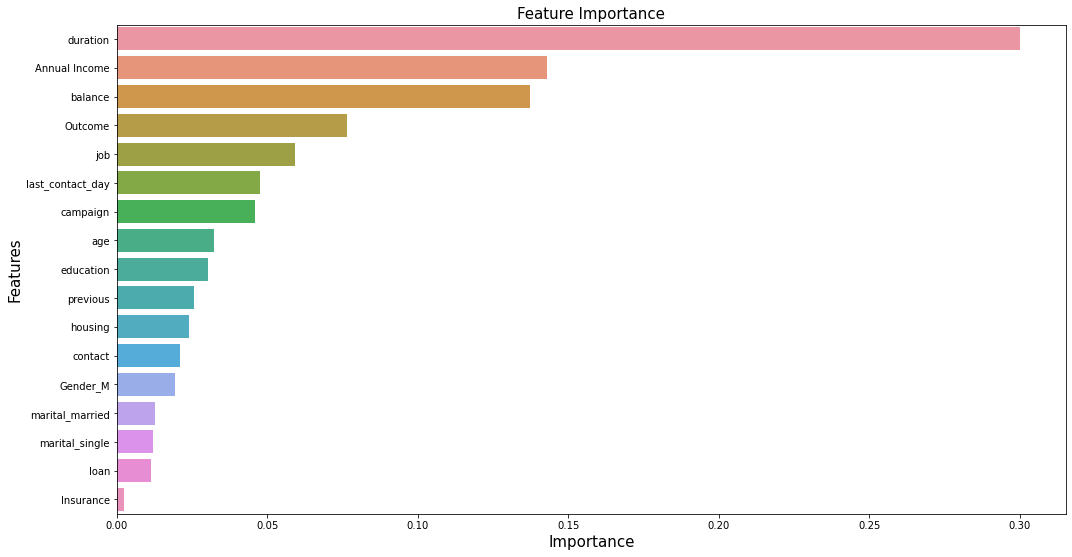

In [478]:
important_features = pd.DataFrame({'Features': x_train.columns, 
                                   'Importance': rf_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

**Interpretation:** From the above bar plot, we can see that `duration` is the most important feature in the dataset.

#### Define a function to plot the ROC curve.

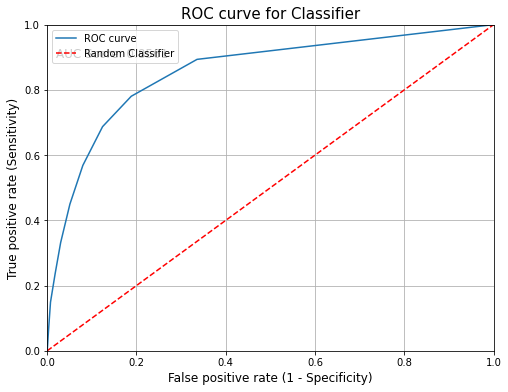

In [488]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(model, test_data, y_test):
    y_pred_prob = model.predict_proba(test_data)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC curve for Classifier', fontsize=15)
    plt.xlabel('False positive rate (1 - Specificity)', fontsize=12)
    plt.ylabel('True positive rate (Sensitivity)', fontsize=12)
    plt.text(0.02, 0.9, f'AUC Score: {roc_auc_score(y_test, y_pred_prob):.4f}', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming you have trained a model and have test data (X_test) and true labels (y_test)
plot_roc(rf_model, x_test, y_test)


### 5. Boosting Methods

The Ensemble technique considers multiple models for predicting the results. `Bagging` and `Boosting` are two of the types of ensembles. The bagging methods construct the multiple models in parallel; whereas, the boosting methods construct the models sequentially.

The boosting method fits multiple weak classifiers to create a strong classifier. In this method, the model tries to correct the errors in the previous model.

## 5.1 AdaBoost

Let us build the AdaBoost classifier with decision trees. The model creates several stumps (decision tree with only a single decision node and two leaf nodes) on the train set and predicts the class based on these weak learners (stumps). For the first model, it assigns equal weights to each sample. It assigns the higher weight for the wrongly predicted samples and lower weight for the correctly predicted samples. This method continues till all the observations are correctly classified or the predefined number of stumps is created.

#### Build an Adaboost model on a training dataset.

In [490]:
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)
ada_model.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=40, random_state=10)

**Calculate performance measures on the test set.**

In [494]:
test_report = get_test_report(ada_model)
print(test_report)

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94      7966
         1.0       0.62      0.35      0.45      1052

    accuracy                           0.90      9018
   macro avg       0.77      0.66      0.70      9018
weighted avg       0.88      0.90      0.89      9018



#### Plot the ROC curve.

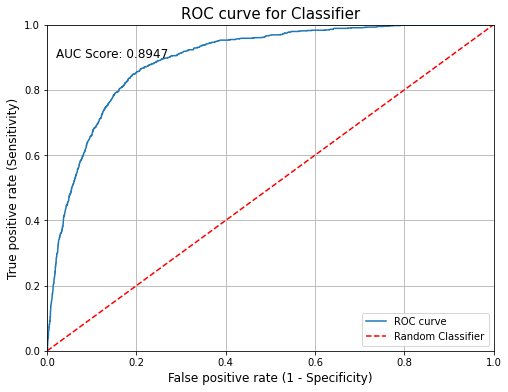

In [496]:
plot_roc(ada_model, x_test, y_test)

In [501]:
# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(x_test)
y_train_pred=nb_classifier.predict(x_train)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))
print(classification_report(y_train,y_train_pred))


              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90      7966
         1.0       0.34      0.51      0.41      1052

    accuracy                           0.83      9018
   macro avg       0.63      0.69      0.65      9018
weighted avg       0.86      0.83      0.84      9018

              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90     31846
         1.0       0.35      0.52      0.42      4225

    accuracy                           0.83     36071
   macro avg       0.64      0.69      0.66     36071
weighted avg       0.86      0.83      0.84     36071



Naive Bayes is giving us better results so for now i am going with it.

# Models using K-Fols Cross Validation

Decision Tree

In [509]:
Decision_Tree=DecisionTreeClassifier()
kf=KFold(shuffle=True,random_state=42)
roc_score=cross_val_score(Decision_Tree,df_var,df_target,scoring='roc_auc',cv=kf)
score_recall=cross_val_score(Decision_Tree,df_var,df_target,scoring='recall',cv=kf)
Average_score_recall=(np.mean(score_recall))*100
Average_Score=(np.mean(roc_score))*100
print('Average roc-auc :',Average_Score)
print('Average recall :',Average_score_recall)

Average roc-auc : 66.52208223465
Average recall : 41.421655551663825


Random Forest

In [510]:
Random_Forest=RandomForestClassifier()
kf=KFold(shuffle=True,random_state=42)
roc_score=cross_val_score(Random_Forest,df_var,df_target,scoring='roc_auc',cv=kf)
score_recall=cross_val_score(Random_Forest,df_var,df_target,scoring='recall',cv=kf)
Average_score_recall=(np.mean(score_recall))*100
Average_Score=(np.mean(roc_score))*100
print('Average roc-auc :',Average_Score)
print('Average recall :',Average_score_recall)

Average roc-auc : 89.28642904387235
Average recall : 36.96334955410863


Ada Boost

In [511]:
Ada=AdaBoostClassifier()
kf=KFold(shuffle=True,random_state=42)
roc_score=cross_val_score(Ada,df_var,df_target,scoring='roc_auc',cv=kf)
score_recall=cross_val_score(Ada,df_var,df_target,scoring='recall',cv=kf)
Average_score_recall=(np.mean(score_recall))*100
Average_Score=(np.mean(roc_score))*100
print('Average roc-auc :',Average_Score)
print('Average recall :',Average_score_recall)

Average roc-auc : 89.65806154285627
Average recall : 35.5199943450479


In [513]:
nb=GaussianNB()
kf=KFold(shuffle=True,random_state=42)
roc_score=cross_val_score(nb,df_var,df_target,scoring='roc_auc',cv=kf)
score_recall=cross_val_score(nb,df_var,df_target,scoring='recall',cv=kf)
Average_score_recall=(np.mean(score_recall))*100
Average_Score=(np.mean(roc_score))*100
print('Average roc-auc :',Average_Score)
print('Average recall :',Average_score_recall)

Average roc-auc : 81.30098131638464
Average recall : 52.61882607738209


Naive Bayse is giving best score

In [506]:
clfs = {
    'Naive_bayes' : GaussianNB(),
    'Decision_Tree' : DecisionTreeClassifier(),
    'Random_forest' : RandomForestClassifier(),
    'Ada_Boost' : AdaBoostClassifier()
}

models_report = pd.DataFrame(columns=['model name', 'accuracy', 'recall', 'precision', 'roc auc', 'f1 score'])

for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('Fitting model...', clf_name)
    t = {'model name' : clf_name,
        'accuracy' : accuracy_score(y_test,y_pred),
        'recall' : recall_score(y_test,y_pred),
        'precision' : precision_score(y_test,y_pred),
         'roc auc' : roc_auc_score(y_test,y_pred),
        'f1 score' : f1_score(y_test,y_pred),
         'cohen_kappa_score' : cohen_kappa_score(y_test,y_pred)
        }
    models_report = models_report.append(t, ignore_index=True)

models_report = models_report.sort_values(by='f1 score', ascending=False)
models_report


Fitting model... Naive_bayes
Fitting model... Decision_Tree
Fitting model... Random_forest
Fitting model... Ada_Boost


,model name,accuracy,recall,precision,roc auc,f1 score,cohen_kappa_score
2,Random_forest,0.898758,0.361217,0.611916,0.665482,0.454274,0.402531
3,Ada_Boost,0.897871,0.352662,0.607201,0.661267,0.446182,0.394257
0,Naive_bayes,0.825904,0.514259,0.338125,0.690659,0.407994,0.311011
1,Decision_Tree,0.852961,0.411597,0.379825,0.661422,0.395073,0.311536


# Model using Auto ML (PYCARET)

In [515]:
from pycaret.classification import *

clf_exp = setup(data=df, target='Term Deposit', session_id=42, train_size=0.8)

# Compare different models
best_model = compare_models()

# # Train the best model
# tuned_model = tune_model(best_model)

# # Evaluate the model
# evaluate_model(tuned_model)

# # Make predictions on the test set
# predictions = predict_model(tuned_model, data=data)

# # Save the model
# save_model(tuned_model, 'final_model')


,Description,Value
0,Session id,42
1,Target,Term Deposit
2,Target type,Binary
3,Original data shape,"(45089, 18)"
4,Transformed data shape,"(45089, 18)"
5,Transformed train set shape,"(36071, 18)"
6,Transformed test set shape,"(9018, 18)"
7,Numeric features,17
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9037,0.9058,0.4036,0.6402,0.4948,0.4446,0.4592,7.3820
gbc,Gradient Boosting Classifier,0.9029,0.9040,0.3884,0.6411,0.4836,0.4336,0.4503,3.6220
lightgbm,Light Gradient Boosting Machine,0.9023,0.9061,0.3982,0.6310,0.4879,0.4370,0.4513,0.6960
rf,Random Forest Classifier,0.9000,0.8935,0.3709,0.6220,0.4642,0.4130,0.4301,2.5940
xgboost,Extreme Gradient Boosting,0.8993,0.8994,0.3894,0.6089,0.4748,0.4222,0.4352,2.3640
ada,Ada Boost Classifier,0.8989,0.8965,0.3527,0.6205,0.4496,0.3986,0.4180,1.0510
et,Extra Trees Classifier,0.8945,0.8784,0.3025,0.5973,0.4011,0.3501,0.3748,1.8800
lda,Linear Discriminant Analysis,0.8939,0.8735,0.3129,0.5875,0.4081,0.3558,0.3773,0.1980
lr,Logistic Regression,0.8932,0.8733,0.2383,0.6121,0.3428,0.2968,0.3364,1.2280
ridge,Ridge Classifier,0.8890,0.0000,0.1284,0.6278,0.2128,0.1803,0.2484,0.1000


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Catboost according to Pycaret is giving best F1 Score